In [103]:
############### Libraries ###############
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import pprint

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
############### Data ###############
os.chdir('/Users/biancaorozco/Desktop/Metis/project3/heart_project3/data')
df = pd.read_csv('cleveland_data.csv')
df.head()

,age,gender,cpain,restbp,chol,bsugar,restecg,maxhr,exercisecp,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [86]:
############### Funcitons ###############
## Model F1 Scores
def score_model(model, Xtrain, ytrain):  
    kf = KFold(n_splits=5, shuffle=True, random_state=33)
    train_scores = cross_val_score(model, Xtrain, ytrain, cv=kf, scoring='f1')
    
    return np.mean(train_scores) 

def matrix_model(model, Xtrain, ytrain):
    Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=.25, random_state=33)
    fit_mod = model.fit(Xtrain, ytrain)
    
    cmatrix = confusion_matrix(yval, fit_mod.predict(Xval))
    
    return cmatrix

def roc_model(model, Xtrain, ytrain, model_name):
    Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=.25, random_state=33)
    model.fit(Xtrain, ytrain)

    fpr, tpr, thresholds = roc_curve(yval, model.predict_proba(Xval)[:,1])

    plt.plot(fpr, tpr,lw=2, label=model_name)
    plt.plot([0,1],[0,1],c='red',ls='--')
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])


    plt.xlabel('False positive rate (1-Specificity)')
    plt.ylabel('True positive rate (Sensitivity)')
    plt.title('ROC Curve for Heart Disease Prediction')
    plt.legend();
    print(f"{model_name} AUC score = ", roc_auc_score(yval, model.predict_proba(Xval)[:,1]))
    
    return 


In [4]:
############### Cleaning Data ###############
## Replacing ? and empty values with NaNs
nan = np.nan
df.replace('?', value=nan, inplace=True)
# df.replace('', value=nan, inplace=True)

## Dropping rows with NaNs
# df.isna().sum()
df = df.dropna()
# df.isna().sum()

## Change string numbers to numeric
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])
# df['target'] = pd.to_numeric(df['target'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 300
Data columns (total 14 columns):
age           297 non-null int64
gender        297 non-null int64
cpain         297 non-null int64
restbp        297 non-null int64
chol          297 non-null int64
bsugar        297 non-null int64
restecg       297 non-null int64
maxhr         297 non-null int64
exercisecp    297 non-null int64
oldpeak       297 non-null float64
slope         297 non-null int64
ca            297 non-null int64
thal          297 non-null int64
target        297 non-null int64
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


In [5]:
############### New Target ###############
target1 = np.minimum(df.target, 1)
df['target1'] = target1
df.tail()

,age,gender,cpain,restbp,chol,bsugar,restecg,maxhr,exercisecp,oldpeak,slope,ca,thal,target,target1
296,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1,1
297,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,1
298,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,1
299,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,1
300,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,1


In [6]:
############### Features/Target ###############
X, y = df.drop(['target', 'target1'], axis=1), df['target1']
X, y = np.array(X), np.array(y)

In [30]:
############### Train/Test ###############
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=33)

In [22]:
############### F1 Scores/Feature Importance ###############
## Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=2)
print('KNN: ', score_model(knn, Xtrain, ytrain))

## SVM
svm = SVC(kernel="linear")
print('SVM: ', score_model(svm, Xtrain, ytrain))

## Decision Tree
decisiontree = DecisionTreeClassifier()
print('Decision Tree: ', score_model(decisiontree, Xtrain, ytrain))

## Random Forest
randomforest = RandomForestClassifier(n_estimators=300)
print('Random Forest: ', score_model(randomforest, Xtrain, ytrain))

## Logistic Regression
logisticregression = LogisticRegression(C=100)
print('Logistic Regression: ', score_model(logisticregression, Xtrain, ytrain))

KNN:  0.44791100847749155
SVM:  0.7817386137590742
Decision Tree:  0.7002749556030631
Random Forest:  0.8037888198757763
Logistic Regression:  0.8191691384358517


/Users/biancaorozco/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/biancaorozco/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/biancaorozco/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/biancaorozco/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/biancaorozco/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

/Users/biancaorozco/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/biancaorozco/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Logistic Regression: 
 [[30  5]
 [ 8 17]]
Logistic Regression AUC score =  0.8331428571428571
Logistic Regression:  None

Random Forest: 
 [[31  4]
 [ 8 17]]
Random Forest AUC score =  0.8651428571428571
Random Forest:  None


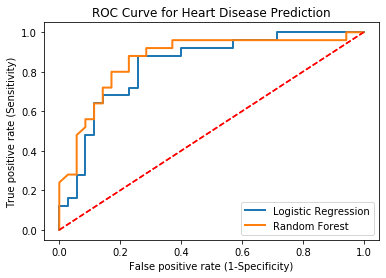

In [87]:
############### Matrix, ROC, AUC ###############
## Logistic Regression
print('\nLogistic Regression: \n', matrix_model(logisticregression, Xtrain, ytrain))
print('Logistic Regression: ', roc_model(logisticregression, Xtrain, ytrain, 'Logistic Regression'))

## Random Forest
print('\nRandom Forest: \n', matrix_model(randomforest, Xtrain, ytrain))
print('Random Forest: ', roc_model(randomforest, Xtrain, ytrain, 'Random Forest'))

In [100]:
randomforest.feature_importances_

array([0.08232086, 0.02608551, 0.14185747, 0.06852711, 0.07615799,
       0.00818054, 0.02469564, 0.11431104, 0.06321794, 0.10179648,
       0.04654246, 0.11261854, 0.13368843])

In [105]:
############### Test Model ###############
randomforest.fit(Xtrain, ytrain)
ypred = randomforest.predict(Xtest)
print(f1_score(ytest, ypred))
cmatrix = confusion_matrix(ytest, ypred)
cmatrix

0.7719298245614036


array([[25,  3],
       [10, 22]])

Random Forest AUC score =  0.898


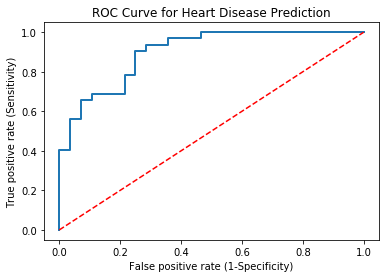

In [111]:
fpr, tpr, thresholds = roc_curve(ytest, randomforest.predict_proba(Xtest)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='red',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.title('ROC Curve for Heart Disease Prediction');
rf_auc = roc_auc_score(ytest, randomforest.predict_proba(Xtest)[:,1])
print("Random Forest AUC score = ", round(rf_auc, 3))